In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from scipy.integrate import odeint

In [4]:
%matplotlib inline

Class for particle in 2D 
Writing RK4 for 2D using particle1d.py

In [5]:
class Particle2D (object):
    m = 1.0
    def __init__(self, x0 = 0.0, z0 = 0.0, vx0 = 0.0, vz0 = 5, tf = 10.0, dt = 0.001):
        self.x = x0
        self.z = z0
        self.vx = vx0
        self.vz = vz0
        self.t = 0.0
        self.tf = tf
        self.dt = dt
        self.tlabel = 'time (s)'
        self.xlabel = 'x (m)'
        self.zlabel = 'z (m)'
        self.vxlabel = 'v_x (m/s)'
        self.vzlabel = 'v_z (m/s)'
        npoints = int(tf/dt) #starting at t = 0.0
        self.npoints = npoints
        self.tarray = np.linspace(0.0, tf,npoints, endpoint = True) # include final timepoint
        self.xv0 = np.array([self.x, self.vx]) #initial x-position and x-velocity
        self.zv0 = np.array([self.z, self.vz]) #initial z-position and z-velocity
    def F(self, x, z, vx, vz, t):
        return np.array([0, 0])
    
    def RK4_step(self): # first dimension (x)
        a1_1 = self.F(self.x, self.z, self.vx, self.vz, self.t)[0] / self.m
        k1_1 = np.array([self.vx, a1_1])*self.dt
        a2_1 = self.F(self.x+k1_1[0]/2, self.z, self.vx+k1_1[1]/2, self.vz, self.t+self.dt/2)[0] / self.m
        k2_1 = np.array([self.vx+k1_1[1]/2, a2_1])*self.dt
        a3_1 = self.F(self.x+k2_1[0]/2, self.z, self.vx+k2_1[1]/2, self.vz, self.t+self.dt/2)[0] / self.m
        k3_1 = np.array([self.vx+k2_1[1]/2, a3_1])*self.dt
        a4_1 = self.F(self.x+k3_1[0], self.z, self.vx+k3_1[1], self.vz, self.t+self.dt)[0] / self.m
        k4_1 = np.array([self.vx+k3_1[1], a4_1])*self.dt
        self.x += (k1_1[0]+ k4_1[0])/6 + (k2_1[0] + k3_1[0])/3
        self.vx += (k1_1[1]+ k4_1[1])/6 + (k2_1[1] + k3_1[1])/3
        
        # second dimension (y) 
        a1_2 = self.F(self.x, self.z, self.vx, self.vz, self.t)[1] / self.m
        k1_2 = np.array([self.vz, a1_2])*self.dt
        a2_2 = self.F(self.x, self.z + k1_2[0]/2, self.vx, self.vz + k1_2[1]/2, self.t+self.dt/2)[1] / self.m
        k2_2 = np.array([self.vz + k1_2[1]/2, a2_2])*self.dt
        a3_2 = self.F(self.x, self.z + k2_2[0]/2, self.vx, self.vz + k2_2[1]/2, self.t+self.dt/2)[1] / self.m
        k3_2 = np.array([self.vz + k2_2[1]/2, a3_2])*self.dt
        a4_2 = self.F(self.x, self.z + k3_2[0], self.vx, self.vz + k3_2[1], self.t+self.dt)[1] / self.m
        k4_2 = np.array([self.vz + k3_2[1], a4_2])*self.dt
        self.z += (k1_2[0]+ k4_2[0])/6 + (k2_2[0] + k3_2[0])/3
        self.vz += (k1_2[1]+ k4_2[1])/6 + (k2_2[1] + k3_2[1])/3
        if self.z < 0:
            self.z = 0
            self.vx = 0
        self.t += self.dt
    def RK4_trajectory(self): # Trajectory, Initializing
        x_RK4 = []
        z_RK4 = []
        vx_RK4 = []
        vz_RK4 = []
        for ii in range(self.npoints):
            x_RK4.append(self.x)
            z_RK4.append(self.z)
            vx_RK4.append(self.vx)
            vz_RK4.append(self.vz)
            self.RK4_step()
        self.x_RK4 = np.array(x_RK4)
        self.z_RK4 = np.array(z_RK4)
        self.vx_RK4 = np.array(vx_RK4)
        self.vz_RK4 = np.array(vz_RK4)

In [6]:
class Particle3D (object):
    m = 1.0
    def __init__(self, x0 = 0.0, y0=0.0, z0 = 0.0, vx0 = 0.0, vy0=0.0, vz0 = 5, tf = 10.0, dt = 0.001):
        self.x = x0
        self.y = y0
        self.z = z0
        self.vx = vx0
        self.vy = vy0
        self.vz = vz0
        self.t = 0.0
        self.tf = tf
        self.dt = dt
        self.tlabel = 'time (s)'
        self.xlabel = 'x (m)'
        self.zlabel = 'z (m)'
        self.vxlabel = 'v_x (m/s)'
        self.vzlabel = 'v_z (m/s)'
        npoints = int(tf/dt) #starting at t = 0.0
        self.npoints = npoints
        self.tarray = np.linspace(0.0, tf,npoints, endpoint = True) # include final timepoint
        self.xv0 = np.array([self.x, self.vx]) #initial x-position and x-velocity
        self.zv0 = np.array([self.z, self.vz]) #initial z-position and z-velocity
        self.yv0 = np.array([self.y, self.vy]) #initial y-position and x-velocity
    def F(self, x, z, vx, vz, t):
        return np.array([0, 0])
    
    def RK4_step(self): # first dimension (x)
        a1_1 = self.F(self.x, self.z, self.vx, self.vz, self.t)[0] / self.m
        k1_1 = np.array([self.vx, a1_1])*self.dt
        a2_1 = self.F(self.x+k1_1[0]/2, self.z, self.vx+k1_1[1]/2, self.vz, self.t+self.dt/2)[0] / self.m
        k2_1 = np.array([self.vx+k1_1[1]/2, a2_1])*self.dt
        a3_1 = self.F(self.x+k2_1[0]/2, self.z, self.vx+k2_1[1]/2, self.vz, self.t+self.dt/2)[0] / self.m
        k3_1 = np.array([self.vx+k2_1[1]/2, a3_1])*self.dt
        a4_1 = self.F(self.x+k3_1[0], self.z, self.vx+k3_1[1], self.vz, self.t+self.dt)[0] / self.m
        k4_1 = np.array([self.vx+k3_1[1], a4_1])*self.dt
        self.x += (k1_1[0]+ k4_1[0])/6 + (k2_1[0] + k3_1[0])/3
        self.vx += (k1_1[1]+ k4_1[1])/6 + (k2_1[1] + k3_1[1])/3
        
        # second dimension (y) 
        a1_2 = self.F(self.x, self.z, self.vx, self.vz, self.t)[1] / self.m
        k1_2 = np.array([self.vz, a1_2])*self.dt
        a2_2 = self.F(self.x, self.z + k1_2[0]/2, self.vx, self.vz + k1_2[1]/2, self.t+self.dt/2)[1] / self.m
        k2_2 = np.array([self.vz + k1_2[1]/2, a2_2])*self.dt
        a3_2 = self.F(self.x, self.z + k2_2[0]/2, self.vx, self.vz + k2_2[1]/2, self.t+self.dt/2)[1] / self.m
        k3_2 = np.array([self.vz + k2_2[1]/2, a3_2])*self.dt
        a4_2 = self.F(self.x, self.z + k3_2[0], self.vx, self.vz + k3_2[1], self.t+self.dt)[1] / self.m
        k4_2 = np.array([self.vz + k3_2[1], a4_2])*self.dt
        self.z += (k1_2[0]+ k4_2[0])/6 + (k2_2[0] + k3_2[0])/3
        self.vz += (k1_2[1]+ k4_2[1])/6 + (k2_2[1] + k3_2[1])/3
        if self.z < 0:
            self.z = 0
            self.vx = 0
        self.t += self.dt
    def RK4_trajectory(self): # Trajectory, Initializing
        x_RK4 = []
        z_RK4 = []
        vx_RK4 = []
        vz_RK4 = []
        for ii in range(self.npoints):
            x_RK4.append(self.x)
            z_RK4.append(self.z)
            vx_RK4.append(self.vx)
            vz_RK4.append(self.vz)
            self.RK4_step()
        self.x_RK4 = np.array(x_RK4)
        self.z_RK4 = np.array(z_RK4)
        self.vx_RK4 = np.array(vx_RK4)
        self.vz_RK4 = np.array(vz_RK4)

# Problem 1:
Using RK4 written above. SOlving x and y spearetly.

In [7]:
class DragParticle(Particle2D):
    def __init__(self, m = 1, x0 = 0.0, z0 = 0.0, vx0 = 1.0, vz0 = 0.0, tf = 30.0, dt = 0.01, A = 1.0):
        self.m = m
        self.A = A
        super().__init__(x0,z0,vx0,vz0,tf,dt) # calling the super class
    def F(self, x, z, vx, vz, t):
        g = -9.8
        a = 6.5 * 10**-3
        alpha = 2.5
        T = 300 # T in Kelvins
        ro0 = 1.225 # sea level air density
        ro = ro0 * (1 - (a*z)/T)**alpha
        Fx = -(1/4) * ro * self.A * vx*np.abs(vx) #drag force in x direction
        Fz = -(1/4) * ro * self.A * vz*np.abs(vz) #drag force in z direction
        return np.array([Fx, Fz + self.m*g])
    def F_constant(self, x, z, vx, vz, t): #if constant force use this
        g = -9.8 # gravitational acceleration m/s^2
        a = 6.5 * 10**-3 #k/m given in the problem
        alpha = 2.5 # given in the problem
        T = 300 # Temperature in Kelvin
        ro0 = 1.225 # air density at sea level in kg/m^3
        ro = ro0
        Fx = -(1/4) * ro * self.A * vx*np.abs(vx)
        Fz = -(1/4) * ro * self.A * vz*np.abs(vz)
        return np.array([Fx, Fz + self.m*g])
    def RK4_step_constant(self): # Just rewriting the same RK4 but using the constant F
        a1_1 = self.F_constant(self.x, self.z, self.vx, self.vz, self.t)[0] / self.m
        k1_1 = np.array([self.vx, a1_1])*self.dt
        a2_1 = self.F_constant(self.x+k1_1[0]/2, self.z, self.vx+k1_1[1]/2, self.vz, self.t+self.dt/2)[0] / self.m
        k2_1 = np.array([self.vx+k1_1[1]/2, a2_1])*self.dt
        a3_1 = self.F_constant(self.x+k2_1[0]/2, self.z, self.vx+k2_1[1]/2, self.vz, self.t+self.dt/2)[0] / self.m
        k3_1 = np.array([self.vx+k2_1[1]/2, a3_1])*self.dt
        a4_1 = self.F_constant(self.x+k3_1[0], self.z, self.vx+k3_1[1], self.vz, self.t+self.dt)[0] / self.m
        k4_1 = np.array([self.vx+k3_1[1], a4_1])*self.dt
        self.x += (k1_1[0]+ k4_1[0])/6 + (k2_1[0] + k3_1[0])/3
        self.vx += (k1_1[1]+ k4_1[1])/6 + (k2_1[1] + k3_1[1])/3
        
        a1_2 = self.F_constant(self.x, self.z, self.vx, self.vz, self.t)[1] / self.m
        k1_2 = np.array([self.vz, a1_2])*self.dt
        a2_2 = self.F_constant(self.x, self.z + k1_2[0]/2, self.vx, self.vz + k1_2[1]/2, self.t+self.dt/2)[1] / self.m
        k2_2 = np.array([self.vz + k1_2[1]/2, a2_2])*self.dt
        a3_2 = self.F_constant(self.x, self.z + k2_2[0]/2, self.vx, self.vz + k2_2[1]/2, self.t+self.dt/2)[1] / self.m
        k3_2 = np.array([self.vz + k2_2[1]/2, a3_2])*self.dt
        a4_2 = self.F_constant(self.x, self.z + k3_2[0], self.vx, self.vz + k3_2[1], self.t+self.dt)[1] / self.m
        k4_2 = np.array([self.vz + k3_2[1], a4_2])*self.dt
        self.z += (k1_2[0]+ k4_2[0])/6 + (k2_2[0] + k3_2[0])/3
        self.vz += (k1_2[1]+ k4_2[1])/6 + (k2_2[1] + k3_2[1])/3
        if self.z < 0:
            self.z = 0
            self.vz = 0
        self.t += self.dt
    def RK4_trajectory_constant(self): # calculating trajectory for constant force case
        x_RK4 = []
        z_RK4 = []
        vx_RK4 = []
        vz_RK4 = []
        for ii in range(self.npoints):
            x_RK4.append(self.x)
            z_RK4.append(self.z)
            vx_RK4.append(self.vx)
            vz_RK4.append(self.vz)
            self.RK4_step_constant()
        self.x_RK4 = np.array(x_RK4)
        self.z_RK4 = np.array(z_RK4)
        self.vx_RK4 = np.array(vx_RK4)
        self.vz_RK4 = np.array(vz_RK4)

In [8]:
projectile = DragParticle(m = 10, x0 = 0.0, vz0 = 200, A = 0.01, tf = 80)
projectile.RK4_trajectory()

projectile_noDrag = DragParticle(m = 10, x0 = 0.0, vz0 = 200, A = 0.00, tf = 80)
projectile_noDrag.RK4_trajectory()

projectile_constant = DragParticle(m = 10, x0 = 0.0, vz0 = 200, A = 0.01, tf = 80)
projectile_constant.RK4_trajectory_constant()

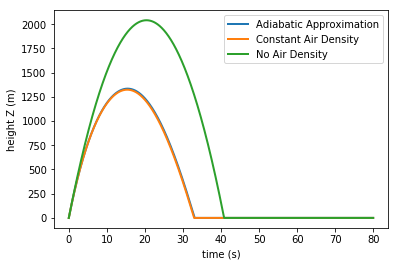

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(projectile.tarray, projectile.z_RK4, lw = 2, label = "Adiabatic Approximation")
ax.plot(projectile_constant.tarray, projectile_constant.z_RK4, lw = 2, label = "Constant Air Density")
ax.plot(projectile_noDrag.tarray, projectile_noDrag.z_RK4, lw = 2, label = "No Air Density")
plt.legend(loc = "upper right",fontsize = 10)
plt.xlabel("time (s)", fontsize = 10)
plt.ylabel("height Z (m)", fontsize = 10)
plt.show()

Maximum Range vs launching Angle: 

In [10]:
range_case1 = [] #with Drag
range_case2 = [] # No drag
v = 50 #finding angle at low velocity
angles = range(5,90,10)
for angle in angles: # components of V in x and y directions:
    vx_initial = v*np.cos(np.radians(angle))
    vz_initial = v*np.sin(np.radians(angle))
    Drag_case = DragParticle(m = 10, vx0 = vx_initial, vz0 = vz_initial, A = 0.01, tf = 100)
    Drag_case.RK4_trajectory() #setting A = 0 for no drag
    NoDrag_case = DragParticle(m = 10, vx0 = vx_initial, vz0 = vz_initial, A = 0.0, tf = 100)
    NoDrag_case.RK4_trajectory()
    range_case1.append(max(Drag_case.x_RK4))
    range_case2.append(max(NoDrag_case.x_RK4))

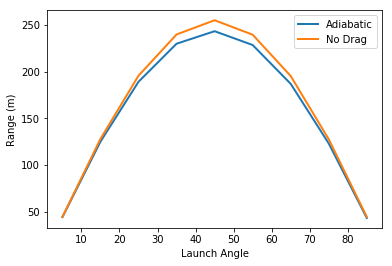

45
45


In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(5,90,10),range_case1, lw = 2, label = "Adiabatic")
ax.plot(range(5,90,10),range_case2, lw = 2, label = "No Drag")
plt.xlabel("Launch Angle")
plt.ylabel("Range (m)")
plt.legend()
plt.show()
print(angles[np.argmax(range_case1)])
print(angles[np.argmax(range_case2)])

corresponding angles are 45 for adiabatic and 45 for No drag as well. 45 is what I was expecting. 

In [13]:
range_case1 = [] #with Drag
range_case2 = [] # No drag
v = 500 #finding angles at high velocity 
angles = range(5,90,10) # going from small angle to sraigh up, 90 degrees for every 10 degrees
for angle in angles: # components of V in x and y directions:
    vx_initial = v*np.cos(np.radians(angle))
    vz_initial = v*np.sin(np.radians(angle))
    Drag_case = DragParticle(m = 10, vx0 = vx_initial, vz0 = vz_initial, A = 0.01, tf = 100)
    Drag_case.RK4_trajectory()
    NoDrag_case = DragParticle(m = 10, vx0 = vx_initial, vz0 = vz_initial, A = 0.0, tf = 100)
    NoDrag_case.RK4_trajectory()
    range_case1.append(max(Drag_case.x_RK4))
    range_case2.append(max(NoDrag_case.x_RK4))

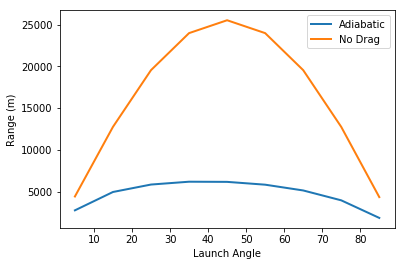

35
45


In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(5,90,10),range_case1, lw = 2, label = "Adiabatic")
ax.plot(range(5,90,10),range_case2, lw = 2, label = "No Drag")
plt.xlabel("Launch Angle")
plt.ylabel("Range (m)")
plt.legend()
plt.show()
print(angles[np.argmax(range_case1)])
print(angles[np.argmax(range_case2)])

corresponding angles are 35 for Adiabatic model and 45 for no drag case

We expect the max range angle to be around 45. At relatively low velocity (50m/s) we see that there is almost no detectable affect from the drag force with respect to max range angle.
For higher speeds like 500 m/s the maximum range anlge is smaller because the projectile is experiencing more resistance going while traveling to a higher y, resistance decreases and it will reach higher y in this case. 

# Part b

In [19]:
class gofy(Particle2D): # g of y is g as a function of y
    def __init__(self, m = 1, x0 = 0.0, z0 = 0.0, vx0 = 5.0, vz0 = 0.0, tf = 20.0, dt = 0.01, A = 2.0):
        self.m = m
        self.A = A
        super().__init__(x0,z0,vx0,vz0,tf,dt)
    def F(self, x, z, vx, vz, t):
        Re = 6378000 
        g = -9.8 * (Re / (Re + z))**2
        a = 6.5 * 10**-3
        alpha = 2.5
        T = 300
        rho0 = 1.225
        rho = rho0 * (1 - (a*z)/T)**alpha
        Fx = -(1/4) * rho * self.A * vx*np.abs(vx)
        Fz = -(1/4) * rho * self.A * vz*np.abs(vz)
        return np.array([Fx, Fz + self.m*g])

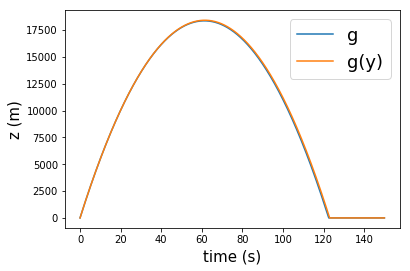

In [17]:
#No Drag
constant_g = DragParticle(m = 10, x0 = 0.0, vz0 = 600, A = 0.00, tf = 150, dt = 0.1)
constant_g.RK4_trajectory()
gofy = gofy(m = 10, x0 = 0.0, vz0 = 600, A = 0.00, tf = 150, dt = 0.1)
gofy.RK4_trajectory()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(constant_g.tarray, constant_g.z_RK4, label = "g")
ax.plot(gofy.tarray, gofy.z_RK4, label = "g(y)")
plt.legend(loc = "upper right",fontsize = 18)
plt.xlabel("time (s)", fontsize = 15)
plt.ylabel("z (m)", fontsize = 15)
plt.show()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


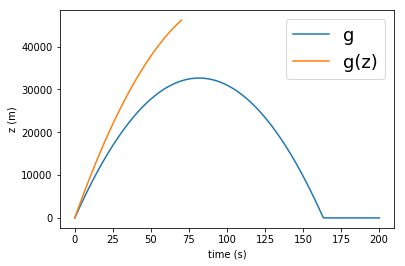

In [20]:
#No Drag
constant_g = DragParticle(m = 10, x0 = 0.0, vz0 = 800, A = 0.00, tf = 200, dt = 0.05)
constant_g.RK4_trajectory()
gofy_ = gofy(m = 10, x0 = 0.0, vz0 = 1000, A = 0.00, tf = 800, dt = 0.05)
gofy_.RK4_trajectory()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(constant_g.tarray, constant_g.z_RK4, label = "g")
ax.plot(gofy_.tarray, gofy_.z_RK4, label = "g(z)")
plt.legend(loc = "upper right",fontsize = 18)
plt.xlabel("time (s)", fontsize = 10)
plt.ylabel("z (m)", fontsize = 10)
plt.show()

# Problem 2

Z is vertical direction going down the dam. X is the forward direction. 
Doing th cross prodoct in the Magnus force, the force is in the X dirextion if omega is in y direction for backspin.

In [21]:
class SpinParticle(Particle2D):
    def __init__(self, m = 1, x0 = 0.0, z0 = 100, vx0 = 1.0, vz0 = 0.0, tf = 50.0, dt = 1, A = 1.0, wy=10,):
        self.m = m
        self.A = A
        self.wy = wy
        npoints = int(tf/dt) #starting at t = 0.0
        self.npoints = npoints
        self.tarray = np.linspace(0.0, tf,npoints, endpoint = True) # include final timepoint
        super().__init__(x0,z0,vx0,vz0,tf,dt)
    def F_D_x(self, x, z, vx, vz, t):
        g = -9.8
        ro = 1.225 #sea level
        a = 0.25 #given
        b = 0.25 #given
        c = 0.16 #given
        vc = 10
        v = np.sqrt(vx**2+vz**2)
        if v ==0:
            v = 0.001
     # drag force x direction
        ki_x = (v - vc)/4
        if v > vc:
            jx = np.exp(-ki_x**2 / 4)
            Cd_x = a + b/(1+np.exp(ki_x)) - c*jx
            Fd_x = -(0.5 * Cd_x * ro * self.A * vx*np.abs(vx))
        else:
            jx = np.exp(-ki_x**2)
            Cd_x = a + b/(1+np.exp(ki_x)) - c*jx
            Fd_x = -(0.5 * Cd_x * ro * self.A * vx*np.abs(vx))
        return Fd_x
    # z-component of drag force
    def F_D_z(self,x, z, vx, vz, t):
        vc = 10
        g = -9.8
        ro = 1.225 #sea level
        a = 0.25 #given
        b = 0.25 #given
        c = 0.16 #given
        ki_z = (vz - vc)/4
        if v > vc:
            jz = np.exp((-(ki_z)**2)/ 4)
            Cd_z = a + b/(1+np.exp(ki_z)) - c*jz
            Fd_z = -(0.5 * Cd_z * ro * self.A * vz*np.abs(vz))   
        else:
            jz = np.exp(-ki_z**2)
            Cd_z = a + b/(1+np.exp(ki_z)) - c*jz
            Fd_z = -(0.5 * Cd_z * ro * self.A * vz*np.abs(vz))
        return Fd_z    
    def F_backspin(self, x, z, vx, vz, wy, t):
        #self.m= 9
        g = -9.8 # gravitational acceleration m/s^2
        #wy= 10
        r = 0.25
        v = np.sqrt(vx**2+vz**2)
        s = r*wy/(v+.001)
        Cl = 0.5 * s**(0.4)
        alpha = 2.5 # given in the problem
        T = 300 # Temperature in Kelvin
        ro0 = 1.225 # air density at sea level in kg/m^3
        ro = ro0
        A = np.pi*r**2
        FMx = (0.5*Cl * ro* A*r)*(-wy*vz)/s
        FMz = (0.5*Cl * ro* A*r)*(-wy*vx)/s
        return np.array([FMx, self.m*g + FMz])
    def RK4_step_x(self): # Just rewriting the same RK4 but with F backspin and FM

        #ax_1 = (Fx1+Fx2) / m
        #kx_1 = f(vx,ax_1)*dt 

        #def F_backspin(self, x, z, vx, vz, wy, t):
        #def F_D_x(self, x, z vx, vz t):
        #def F_D_z(self,x, z,vx, vz, t):
        #print("drag x ", self.F_D_x(self.x, self.z, self.vx, self.vz, self.t))
        #print("drag z ", self.F_D_z(self.x, self.z, self.vx, self.vz, self.t))
        #print("other ", self.F_backspin(self.x, self.z, self.vx, self.vz, self.wy, self.t))
                
        a1_x = (self.F_backspin(self.x, self.z, self.vx, self.vz, self.wy, self.t)[0] + self.F_D_x(self.x, self.z, self.vx,self.vz, self.t))/ self.m
        k1_x = np.array([self.vx, a1_x])*self.dt
        a2_x = (self.F_backspin(self.x+k1_x[0]/2, self.z, self.vx+k1_x[1]/2, self.vz, self.wy, self.t+self.dt/2)[0]+self.F_D_x(self.x+k1_x[0]/2, self.z, self.vx+k1_x[1]/2,self.vz, self.t+self.dt/2)) / self.m
        k2_x = np.array([self.vx+k1_x[1]/2, a2_x])*self.dt
        a3_x = (self.F_backspin(self.x+k2_x[0]/2, self.z, self.vx+k2_x[1]/2, self.vz, self.wy, self.t+self.dt/2)[0]+self.F_D_x(self.x+k2_x[0]/2, self.z, self.vx+k2_x[1]/2, self.vz, self.t+self.dt/2)) / self.m
        k3_x = np.array([self.vx+k2_x[1]/2, a3_x])*self.dt
        a4_x = (self.F_backspin(self.x+k3_x[0], self.z, self.vx+k3_x[1], self.vz, self.wy, self.t+self.dt)[0]+self.F_D_x(self.x+k3_x[0], self.z, self.vx+k3_x[1], self.vz, self.t+self.dt)) / self.m
        k4_x = np.array([self.vx+k3_x[1], a4_x])*self.dt
        self.x += (k1_x[0]+ k4_x[0])/6 + (k2_x[0] + k3_x[0])/3
        self.vx += (k1_x[1]+ k4_x[1])/6 + (k2_x[1] + k3_x[1])/3
         #def F_D_z(self,x, z,vx, vz, t):
        a1_z = (self.F_backspin(self.x, self.z, self.vx, self.vz, self.wy, self.t)[1] + self.F_D_z(self.x, self.z, self.vx, self.vz, self.t))/ self.m
        k1_z = np.array([self.vz, a1_z])*self.dt
        a2_z = (self.F_backspin(self.x, self.z+k1_z[0]/2, self.vx, self.vz+k1_z[1]/2, self.wy, self.t+self.dt/2)[1]+self.F_D_z(self.x, self.z+k1_z[0]/2, self.vx, self.vz+k1_z[1]/2, self.t+self.dt/2)) / self.m
        k2_z = np.array([self.vz+k1_x[1]/2, a2_z])*self.dt
        a3_z = (self.F_backspin(self.x, self.z+k2_z[0]/2, self.vx, self.vz+k2_z[1]/2, self.wy, self.t+self.dt/2)[1]+self.F_D_z(self.x, self.z+k2_z[0]/2, self.vx, self.vz+k2_z[1]/2, self.t+self.dt/2)) / self.m
        k3_z = np.array([self.vz+k2_z[1]/2, a3_z])*self.dt
        a4_z = (self.F_backspin(self.x, self.z+k3_z[0], self.vx, self.vz+k3_z[1],self.wy, self.t+self.dt)[1]+self.F_D_z(self.x, self.z+k3_z[0], self.vx, self.vz+k3_z[1], self.t+self.dt)) / self.m
        k4_z = np.array([self.vz+k3_x[1], a4_z])*self.dt
        self.z += (k1_z[0]+ k4_z[0])/6 + (k2_z[0] + k3_z[0])/3
        self.vz += (k1_z[1]+ k4_z[1])/6 + (k2_z[1] + k3_z[1])/3
        if self.z < 0:
            self.z = 0
        self.t += self.dt
#         print ('k1 = ',k1_z[0])
#         print ('k2 = ',k2_z[0])
#         print ('k3 = ',k3_z[0])
#         print ('k4 = ',k4_z[0])
#         print ('t = ',self.t)
        
    def RK4_trajectory_backspin(self): # calculating trajectory
        x_RK4 = []
        z_RK4 = []
        vx_RK4 = []
        vz_RK4 = []
        tarray = []
        #if ii in range(self.npoints):
        while (self.z > 0):
            tarray.append(self.t)
            x_RK4.append(self.x)
            z_RK4.append(self.z)
            vx_RK4.append(self.vx)
            vz_RK4.append(self.vz)
            self.RK4_step_x()
        self.x_RK4 = np.array(x_RK4)
        self.z_RK4 = np.array(z_RK4)
        self.vx_RK4 = np.array(vx_RK4)
        self.vz_RK4 = np.array(vz_RK4) 
        self.tarray = np.array(tarray)

In [22]:
#class SpinParticle(Particle2D):
#def __init__(self, m = 1, x0 = 0.0, z0 = 0.0, vx0 = 1.0, vz0 = 0.0, tf = 50.0, dt = 0.01, A = 1.0, wy=10,):
projectile = SpinParticle(m = 0.62, x0 = 0.0, z0 = 100.0, vx0 = 0, vz0 = 0.0, tf = 20.0, dt = 0.1, A = 0.2, wy=10)
projectile10 = SpinParticle(m = 0.62, x0 = 0.0, z0 = 100.0, vx0 = 0, vz0 = 20, tf = 10, dt = 0.1, A = 0.2, wy=10)
projectile.RK4_trajectory_backspin()
projectile10.RK4_trajectory_backspin()

# All the graphs below are only drawn till the basketball hits the ground. both for X and Z. 

<Figure size 432x288 with 0 Axes>

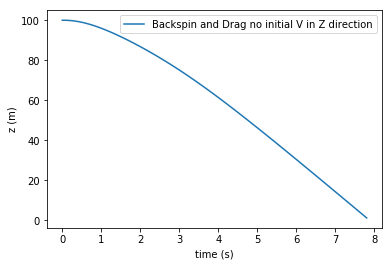

final t =  7.8


In [23]:
fig = plt.figure()
#ax.plot(projectile.tarray, projectile.z_RK4, lw = 2, label = "Height vs Time")
#print(projectile.z_RK4)
#print(projectile.tarray)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(projectile.tarray, projectile.z_RK4, label = "Backspin and Drag no initial V in Z direction")
#ax.plot(projectile.tarray, projectile10.z_RK4, label = "Backspin and Drag no initial V in Z direction")
plt.legend(loc = "upper right",fontsize = 10)
plt.xlabel("time (s)", fontsize = 10)
plt.ylabel("z (m)", fontsize = 10)
plt.show()
print('final t = ', projectile.tarray[-1])

Z goes from initial 100m to 0 in just below 8 seconds (7.8 s) if no initial velocity in Z (vertical) direction .

<Figure size 432x288 with 0 Axes>

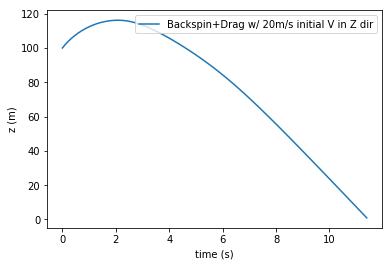

final t =  11.4


In [24]:
fig = plt.figure()
#ax.plot(projectile.tarray, projectile.z_RK4, lw = 2, label = "Height vs Time")
#print(projectile.z_RK4)
#print(projectile.tarray)
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.plot(projectile.tarray, projectile0.z_RK4, label = "Backspin and Drag no initial V in Z direction")
# include final timepoint
ax.plot(projectile10.tarray, projectile10.z_RK4, label = "Backspin+Drag w/ 20m/s initial V in Z dir")
plt.legend(loc = "upper right",fontsize = 10)
plt.xlabel("time (s)", fontsize = 10)
plt.ylabel("z (m)", fontsize = 10)
plt.show()
print('final t = ', projectile10.tarray[-1])

Z goes up and then fall back down and hits the ground about 11.4 seconds after. (we expect it to take longer) 

<Figure size 432x288 with 0 Axes>

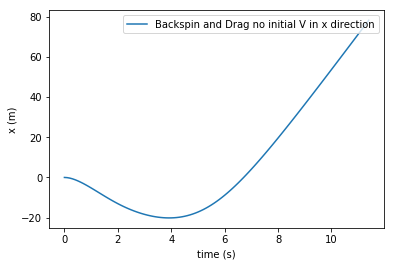

final x =  78.2246247704


In [25]:
fig = plt.figure()
fig = plt.figure()
ax = fig.add_subplot(111)
tarray = np.linspace(0.0, 100, 100, endpoint = True)
ax.plot(projectile10.tarray, projectile10.x_RK4, label = "Backspin and Drag no initial V in x direction")
plt.legend(loc = "upper right",fontsize = 10)
plt.xlabel("time (s)", fontsize = 10)
plt.ylabel("x (m)", fontsize = 10)
plt.show()
print('final x = ', projectile10.x_RK4[-1])

In the case of initial velocity in the X direction, basketball moves backwards in the x direction due to backspin while going up, then it switched direction as its going down and moves forward in X.  It will stop moving forward at t = 11.4 seconds which is when it hits the ground, where z=0.
it will go about net 78.2 meters forward in the x direction

<Figure size 432x288 with 0 Axes>

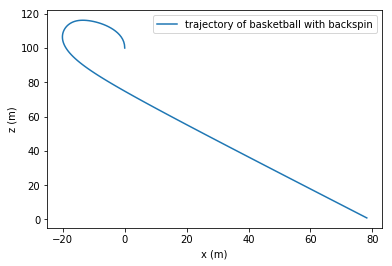

In [26]:
fig = plt.figure()
fig = plt.figure()
ax = fig.add_subplot(111)
tarray = np.linspace(0.0, 100, 100, endpoint = True)
ax.plot(projectile10.x_RK4, projectile10.z_RK4, label = "trajectory of basketball with backspin")
plt.legend(loc = "upper right",fontsize = 10)
plt.xlabel("x (m)", fontsize = 10)
plt.ylabel("z (m)", fontsize = 10)
plt.show()


# Part b
Assuming there is only side spin, and particle having initial forward velocity Vx. I will check the effect of side spin on range. 

In [42]:
class SideSpinParticle(Particle2D):
    def __init__(self, m = 1, x0 = 0.0, y0=0.0, z0 = 100, vx0 = 1.0, vy0=0.0, vz0 = 0.0, tf = 50.0, dt = 1, A = 1.0, wz=1000,):
        self.m = m
        self.A = A
        self.wz = wz
        self.y = y0
        self.vy=vy0
        npoints = int(tf/dt) #starting at t = 0.0
        self.npoints = npoints
        self.tarray = np.linspace(0.0, tf,npoints, endpoint = True) # include final timepoint
        super().__init__(x0,z0,vx0,vz0,tf,dt)
    def F_D_x(self, x, y, z, vx, vy, vz, t):
        g = -9.8
        ro = 1.225 #sea level
        a = 0.25 #given
        b = 0.25 #given
        c = 0.16 #given
        vc = 10
        v = np.sqrt(vx**2 + vy**2 + vz**2)
        if v ==0:
            v = 0.001
     # drag force x direction
        ki_x = (v - vc)/4
        if v > vc:
            jx = np.exp(-ki_x**2 / 4)
            Cd_x = a + b/(1+np.exp(ki_x)) - c*jx
            Fd_x = -(0.5 * Cd_x * ro * self.A * vx*np.abs(vx))
        else:
            jx = np.exp(-ki_x**2)
            Cd_x = a + b/(1+np.exp(ki_x)) - c*jx
            Fd_x = -(0.5 * Cd_x * ro * self.A * vx*np.abs(vx))
        return Fd_x
    def F_D_y(self, x,y, z, vx,vy, vz, t):
        g = -9.8
        ro = 1.225 #sea level
        a = 0.25 #given
        b = 0.25 #given
        c = 0.16 #given
        vc = 10
        v = np.sqrt(vx**2+vy**2+vz**2)
        if v ==0:
            v = 0.001
     # drag force y direction
        ki_y = (v - vc)/4
        if v > vc:
            jy = np.exp(-ki_y**2 / 4)
            Cd_y = a + b/(1+np.exp(ki_y)) - c*jy
            Fd_y = -(0.5 * Cd_y * ro * self.A * vy*np.abs(vy))
        else:
            jy = np.exp(-ki_y**2)
            Cd_y = a + b/(1+np.exp(ki_y)) - c*jy
            Fd_y = -(0.5 * Cd_y * ro * self.A * vy*np.abs(vy))
        #print("FDY = ", Fd_y,' vy = ',vy)
        return Fd_y
    # z-component of drag force
    def F_D_z(self,x,y, z, vx,vy,vz, t):
        vc = 10
        g = -9.8
        ro = 1.225 #sea level
        a = 0.25 #given
        b = 0.25 #given
        c = 0.16 #given
        ki_z = (vz - vc)/4
        if v > vc:
            jz = np.exp((-(ki_z)**2)/ 4)
            Cd_z = a + b/(1+np.exp(ki_z)) - c*jz
            Fd_z = -(0.5 * Cd_z * ro * self.A * vz*np.abs(vz)-self.m*g)   
        else:
            jz = np.exp(-ki_z**2)
            Cd_z = a + b/(1+np.exp(ki_z)) - c*jz
            Fd_z = -(0.5 * Cd_z * ro * self.A * vz*np.abs(vz)-self.m*g)
        return Fd_z    
    def F_sidespin(self, x,y, z, vx, vy, vz, wz, t):
        #self.m= 9
        g = -9.8 # gravitational acceleration m/s^2
        #wy= 10
        r = 0.25
        v = np.sqrt(vx**2 + vy**2 + vz**2)
        s = r*wz/(v+.001)
        Cl = 0.5 * s**(0.4)
        alpha = 2.5 # given in the problem
        T = 300 # Temperature in Kelvin
        ro0 = 1.225 # air density at sea level in kg/m^3
        ro = ro0
        A = np.pi*r**2
        FMx = (0.5*Cl * ro* A*r)*(wz*vy)/s
        FMy = (0.5*Cl * ro* A*r)*(wz*vx)/s
        return np.array([FMx, FMy])
    def RK4_step_x(self): # Just rewriting the same RK4 but with F backspin and FM

        #ax_1 = (Fx1+Fx2) / m
        #kx_1 = f(vx,ax_1)*dt 

        #def F_backspin(self, x, z, vx, vz, wy, t):
        #def F_D_x(self, x, z vx, vz t):
        #def F_D_z(self,x, z,vx, vz, t):
        #print("drag x ", self.F_D_x(self.x, self.z, self.vx, self.vz, self.t))
        #print("drag z ", self.F_D_z(self.x, self.z, self.vx, self.vz, self.t))
        #print("other ", self.F_backspin(self.x, self.z, self.vx, self.vz, self.wy, self.t))
                
        a1_x = (self.F_sidespin(self.x, self.y, self.z, self.vx, self.vy, self.vz, self.wz, self.t)[0] + self.F_D_x(self.x, self.y, self.z, self.vx, self.vy, self.vz, self.t))/ self.m
        k1_x = np.array([self.vx, a1_x])*self.dt
        a2_x = (self.F_sidespin(self.x+k1_x[0]/2, self.y, self.z, self.vx+k1_x[1]/2, self.vy, self.vz, self.wz, self.t+self.dt/2)[0]+self.F_D_x(self.x+k1_x[0]/2, self.y, self.z, self.vx+k1_x[1]/2,self.vy, self.vz, self.t+self.dt/2)) / self.m
        k2_x = np.array([self.vx+k1_x[1]/2, a2_x])*self.dt
        a3_x = (self.F_sidespin(self.x+k2_x[0]/2, self.y, self.z, self.vx+k2_x[1]/2, self.vy, self.vz, self.wz, self.t+self.dt/2)[0]+self.F_D_x(self.x+k2_x[0]/2, self.y, self.z, self.vx+k2_x[1]/2, self.vy, self.vz, self.t+self.dt/2)) / self.m
        k3_x = np.array([self.vx+k2_x[1]/2, a3_x])*self.dt
        a4_x = (self.F_sidespin(self.x+k3_x[0], self.y, self.z, self.vx+k3_x[1], self.vy, self.vz, self.wz, self.t+self.dt)[0]+self.F_D_x(self.x+k3_x[0], self.y, self.z, self.vx+k3_x[1], self.vy, self.vz, self.t+self.dt)) / self.m
        k4_x = np.array([self.vx+k3_x[1], a4_x])*self.dt
        self.x += (k1_x[0]+ k4_x[0])/6 + (k2_x[0] + k3_x[0])/3
        self.vx += (k1_x[1]+ k4_x[1])/6 + (k2_x[1] + k3_x[1])/3
        
        a1_y = (self.F_sidespin(self.x, self.y, self.z, self.vx, self.vy, self.vz, self.wz, self.t)[1] + self.F_D_y(self.x, self.y, self.z, self.vx, self.vy, self.vz, self.t))/ self.m
        k1_y = np.array([self.vy, a1_y])*self.dt
        a2_y = (self.F_sidespin(self.x, self.y+k1_y[0]/2, self.z, self.vx, self.vy+k1_y[1]/2, self.vz, self.wz, self.t+self.dt/2)[1]+self.F_D_y(self.x,self.y+k1_y[0]/2, self.z, self.vx+k1_y[1]/2,self.vy, self.vz, self.t+self.dt/2)) / self.m
        k2_y = np.array([self.vy+k1_y[1]/2, a2_y])*self.dt
        a3_y = (self.F_sidespin(self.y, self.y+k2_y[0]/2, self.z, self.vx, self.vy+k2_y[1]/2, self.vz, self.wz, self.t+self.dt/2)[1]+self.F_D_y(self.x, self.y+k2_y[0]/2, self.z, self.vx, self.vy+k2_y[1]/2, self.vz, self.t+self.dt/2)) / self.m
        k3_y = np.array([self.vy+k2_y[1]/2, a3_y])*self.dt
        a4_y = (self.F_sidespin(self.x, self.y+k3_y[0], self.z, self.vx, self.vy+k3_y[1], self.vz, self.wz, self.t+self.dt)[1]+self.F_D_y(self.x, self.vy+k3_y[0], self.z, self.vx, self.vy+k3_y[1], self.vz, self.t+self.dt)) / self.m
        k4_y = np.array([self.vy+k3_y[1], a4_y])*self.dt
        self.y += (k1_y[0]+ k4_y[0])/6 + (k2_y[0] + k3_y[0])/3
        self.vy += (k1_y[1]+ k4_y[1])/6 + (k2_y[1] + k3_y[1])/3
        
        #print ('k1 = ',k1_y[0])
        #print ('k2 = ',k2_y[0])
        #print ('k3 = ',k3_y[0])
        #print ('k4 = ',k4_y[0])
        #print ('t = ',self.t)
        
         #def F_D_z(self,x, z,vx, vz, t):
        a1_z = (self.F_D_z(self.x, self.y, self.z, self.vx,self.vy, self.vz, self.t))/ self.m
        k1_z = np.array([self.vz, a1_z])*self.dt
        a2_z = (self.F_D_z(self.x, self.y, self.z+k1_z[0]/2, self.vx, self.vy, self.vz+k1_z[1]/2, self.t+self.dt/2)) / self.m
        k2_z = np.array([self.vz+k1_x[1]/2, a2_z])*self.dt
        a3_z = (self.F_D_z(self.x, self.y, self.z+k2_z[0]/2, self.vx, self.vy, self.vz+k2_z[1]/2, self.t+self.dt/2)) / self.m
        k3_z = np.array([self.vz+k2_z[1]/2, a3_z])*self.dt
        a4_z = (self.F_D_z(self.x, self.y, self.z+k3_z[0], self.vx, self.vy, self.vz+k3_z[1], self.t+self.dt)) / self.m
        k4_z = np.array([self.vz+k3_x[1], a4_z])*self.dt
        self.z += (k1_z[0]+ k4_z[0])/6 + (k2_z[0] + k3_z[0])/3
        self.vz += (k1_z[1]+ k4_z[1])/6 + (k2_z[1] + k3_z[1])/3
        if self.z < 0:
            self.z = 0
        self.t += self.dt
        
    def RK4_trajectory_sidespin(self): # calculating trajectory
        x_RK4 = []
        y_RK4 = []
        z_RK4 = []
        vx_RK4 = []
        vy_RK4 = []
        vz_RK4 = []
        tarray = []
        count = 0
        while (self.z > 0):
            #if(count%10==0):print ('processing step = ',count, 'z = ',self.z,'x = ',self.x,'y = ',self.y)
            #count+=1
            tarray.append(self.t)
            x_RK4.append(self.x)
            y_RK4.append(self.y)
            z_RK4.append(self.z)
            vx_RK4.append(self.vx)
            vy_RK4.append(self.vy)
            vz_RK4.append(self.vz)
            self.RK4_step_x()
        self.x_RK4 = np.array(x_RK4)
        self.y_RK4 = np.array(y_RK4)
        self.z_RK4 = np.array(z_RK4)
        self.vx_RK4 = np.array(vx_RK4)
        self.vy_RK4 = np.array(vy_RK4)
        self.vz_RK4 = np.array(vz_RK4) 
        self.tarray = np.array(tarray)
        vxf = self.vx_RK4[-1]
        vyf = self.vy_RK4[-1]
        vzf = self.vz_RK4[-1]

In [38]:
#class SpinParticle(Particle2D):
#def __init__(self, m = 1, x0 = 0.0, z0 = 0.0, vx0 = 1.0, vz0 = 0.0, tf = 50.0, dt = 0.01, A = 1.0, wy=10,):
projectile = SideSpinParticle(m = 0.62, x0 = 0.0, z0 = 100.0, vx0 = 5, vz0 = 0.0, tf = 20.0, dt = 0.01, A = 0.2, wz=1000)

In [39]:
projectile.RK4_trajectory_sidespin()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in exp
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: overflow encountered in exp


2271.38407886
2271.38407886
-9.97984331632


<Figure size 432x288 with 0 Axes>

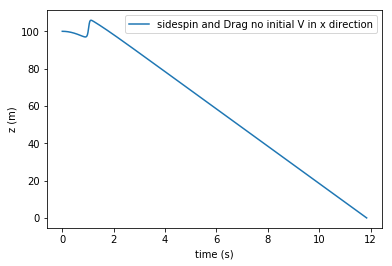

In [30]:
fig = plt.figure()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(projectile.tarray, projectile.z_RK4, label = "sidespin and Drag no initial V in x direction")
#ax.plot(projectile.tarray, projectile10.z_RK4, label = "Backspin and Drag no initial V in Z direction")
plt.legend(loc = "upper right",fontsize = 10)
plt.xlabel("time (s)", fontsize = 10)
plt.ylabel("z (m)", fontsize = 10)
plt.show()

<Figure size 432x288 with 0 Axes>

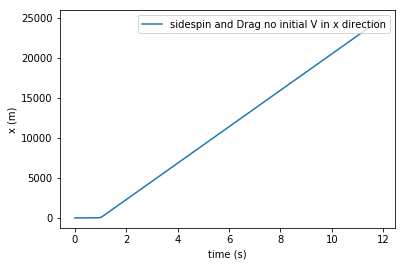

final x =  24662.6422756


In [34]:
fig = plt.figure()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(projectile.tarray, projectile.x_RK4, label = "sidespin and Drag no initial V in x direction")
#ax.plot(projectile.tarray, projectile10.z_RK4, label = "Backspin and Drag no initial V in Z direction")
plt.legend(loc = "upper right",fontsize = 10)
plt.xlabel("time (s)", fontsize = 10)
plt.ylabel("x (m)", fontsize = 10)
plt.show()
print('final x = ', projectile.x_RK4[-1])

<Figure size 432x288 with 0 Axes>

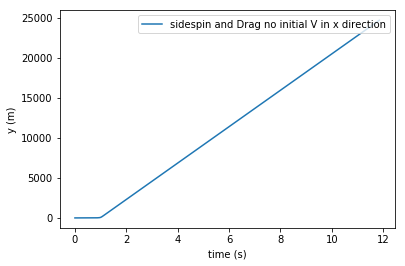

In [32]:
fig = plt.figure()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(projectile.tarray, projectile.y_RK4, label = "sidespin and Drag no initial V in x direction")
#ax.plot(projectile.tarray, projectile10.z_RK4, label = "Backspin and Drag no initial V in Z direction")
plt.legend(loc = "upper right",fontsize = 10)
plt.xlabel("time (s)", fontsize = 10)
plt.ylabel("y (m)", fontsize = 10)
plt.show()

<Figure size 432x288 with 0 Axes>

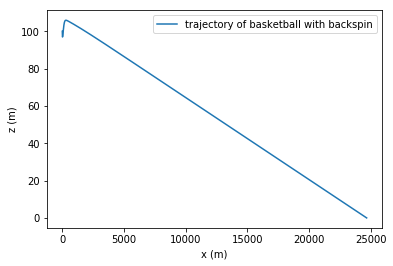

In [33]:
fig = plt.figure()
fig = plt.figure()
ax = fig.add_subplot(111)
tarray = np.linspace(0.0, 100, 100, endpoint = True)
ax.plot(projectile.y_RK4, projectile.z_RK4, label = "trajectory of basketball with backspin")
plt.legend(loc = "upper right",fontsize = 10)
plt.xlabel("x (m)", fontsize = 10)
plt.ylabel("z (m)", fontsize = 10)
plt.show()

In [50]:
#vf = np.sqrt(vxf**2+vyf**2+vzf**2)
vf = 3211.69
m = 0.62
g = -9.8
vx0= 5
Delta_E = m*g*100 + 1/2*m*vx0**2 - 1/2*m*vf**2 
print(Delta_E)
W_drag = F_D_x*x + F_D_Y*y + F_D_z*z

-3198235.1733910004


# part d

It is not reasonable to assume the angular velocity is constant, due to frictional force. Friction will make
ω smaller thorugh the flight. The total torque opposes the rotational motion which is itself proportional to
the angular velocity. Hence the angular velocity changed in time.

ω(t) = ω(0) exp (−t/τ )

For Back Spin case, using variable omega: 

In [101]:
class OmegaSpinParticle(Particle2D):
    def __init__(self, m = 1, x0 = 0.0, z0 = 100, vx0 = 1.0, vz0 = 0.0, tf = 50.0, dt = 1, A = 1.0, wy=10):
        self.m = m
        self.A = A
        self.wy = wy
        npoints = int(tf/dt) #starting at t = 0.0
        self.npoints = npoints
        self.tarray = np.linspace(0.0, tf,npoints, endpoint = True) # include final timepoint
        super().__init__(x0,z0,vx0,vz0,tf,dt)
    def F_D_x(self, x, z, vx, vz, t):
        g = -9.8
        ro = 1.225 #sea level
        a = 0.25 #given
        b = 0.25 #given
        c = 0.16 #given
        vc = 10
        v = np.sqrt(vx**2+vz**2)
        if v ==0:
            v = 0.001
     # drag force x direction
        ki_x = (v - vc)/4
        if v > vc:
            jx = np.exp(-ki_x**2 / 4)
            Cd_x = a + b/(1+np.exp(ki_x)) - c*jx
            Fd_x = -(0.5 * Cd_x * ro * self.A * vx*np.abs(vx))
        else:
            jx = np.exp(-ki_x**2)
            Cd_x = a + b/(1+np.exp(ki_x)) - c*jx
            Fd_x = -(0.5 * Cd_x * ro * self.A * vx*np.abs(vx))
        return Fd_x
    # z-component of drag force
    def F_D_z(self,x, z, vx, vz, t):
        vc = 10
        g = -9.8
        ro = 1.225 #sea level
        a = 0.25 #given
        b = 0.25 #given
        c = 0.16 #given
        ki_z = (vz - vc)/4
        if v > vc:
            jz = np.exp((-(ki_z)**2)/ 4)
            Cd_z = a + b/(1+np.exp(ki_z)) - c*jz
            Fd_z = -(0.5 * Cd_z * ro * self.A * vz*np.abs(vz))   
        else:
            jz = np.exp(-ki_z**2)
            Cd_z = a + b/(1+np.exp(ki_z)) - c*jz
            Fd_z = -(0.5 * Cd_z * ro * self.A * vz*np.abs(vz))
        return Fd_z    
    def F_backspin(self, x, z, vx, vz, wy, t):
        #self.m= 9
        g = -9.8 # gravitational acceleration m/s^2
        #wy= 10
        r = 0.25
        v = np.sqrt(vx**2+vz**2)
        s = r*wy/(v+.001)
        Cl = 0.5 * s**(0.4)
        alpha = 2.5 # given in the problem
        T = 300 # Temperature in Kelvin
        ro0 = 1.225 # air density at sea level in kg/m^3
        ro = ro0
        A = np.pi*r**2
        FMx = (0.5*Cl * ro* A*r)*(-wy*vz)/s
        FMz = (0.5*Cl * ro* A*r)*(-wy*vx)/s
        return np.array([FMx, self.m*g + FMz])
    def RK4_step_x(self): # Just rewriting the same RK4 but with F backspin and FM

        #ax_1 = (Fx1+Fx2) / m
        #kx_1 = f(vx,ax_1)*dt 

        #def F_backspin(self, x, z, vx, vz, wy, t):
        #def F_D_x(self, x, z vx, vz t):
        #def F_D_z(self,x, z,vx, vz, t):
        #print("drag x ", self.F_D_x(self.x, self.z, self.vx, self.vz, self.t))
        #print("drag z ", self.F_D_z(self.x, self.z, self.vx, self.vz, self.t))
        #print("other ", self.F_backspin(self.x, self.z, self.vx, self.vz, self.wy, self.t))
                
        a1_x = (self.F_backspin(self.x, self.z, self.vx, self.vz, self.wy, self.t)[0] + self.F_D_x(self.x, self.z, self.vx,self.vz, self.t))/ self.m
        k1_x = np.array([self.vx, a1_x])*self.dt
        a2_x = (self.F_backspin(self.x+k1_x[0]/2, self.z, self.vx+k1_x[1]/2, self.vz, self.wy, self.t+self.dt/2)[0]+self.F_D_x(self.x+k1_x[0]/2, self.z, self.vx+k1_x[1]/2,self.vz, self.t+self.dt/2)) / self.m
        k2_x = np.array([self.vx+k1_x[1]/2, a2_x])*self.dt
        a3_x = (self.F_backspin(self.x+k2_x[0]/2, self.z, self.vx+k2_x[1]/2, self.vz, self.wy, self.t+self.dt/2)[0]+self.F_D_x(self.x+k2_x[0]/2, self.z, self.vx+k2_x[1]/2, self.vz, self.t+self.dt/2)) / self.m
        k3_x = np.array([self.vx+k2_x[1]/2, a3_x])*self.dt
        a4_x = (self.F_backspin(self.x+k3_x[0], self.z, self.vx+k3_x[1], self.vz, self.wy, self.t+self.dt)[0]+self.F_D_x(self.x+k3_x[0], self.z, self.vx+k3_x[1], self.vz, self.t+self.dt)) / self.m
        k4_x = np.array([self.vx+k3_x[1], a4_x])*self.dt
        self.x += (k1_x[0]+ k4_x[0])/6 + (k2_x[0] + k3_x[0])/3
        self.vx += (k1_x[1]+ k4_x[1])/6 + (k2_x[1] + k3_x[1])/3
         #def F_D_z(self,x, z,vx, vz, t):
        a1_z = (self.F_backspin(self.x, self.z, self.vx, self.vz, self.wy, self.t)[1] + self.F_D_z(self.x, self.z, self.vx, self.vz, self.t))/ self.m
        k1_z = np.array([self.vz, a1_z])*self.dt
        a2_z = (self.F_backspin(self.x, self.z+k1_z[0]/2, self.vx, self.vz+k1_z[1]/2, self.wy, self.t+self.dt/2)[1]+self.F_D_z(self.x, self.z+k1_z[0]/2, self.vx, self.vz+k1_z[1]/2, self.t+self.dt/2)) / self.m
        k2_z = np.array([self.vz+k1_x[1]/2, a2_z])*self.dt
        a3_z = (self.F_backspin(self.x, self.z+k2_z[0]/2, self.vx, self.vz+k2_z[1]/2, self.wy, self.t+self.dt/2)[1]+self.F_D_z(self.x, self.z+k2_z[0]/2, self.vx, self.vz+k2_z[1]/2, self.t+self.dt/2)) / self.m
        k3_z = np.array([self.vz+k2_z[1]/2, a3_z])*self.dt
        a4_z = (self.F_backspin(self.x, self.z+k3_z[0], self.vx, self.vz+k3_z[1],self.wy, self.t+self.dt)[1]+self.F_D_z(self.x, self.z+k3_z[0], self.vx, self.vz+k3_z[1], self.t+self.dt)) / self.m
        k4_z = np.array([self.vz+k3_x[1], a4_z])*self.dt
        self.z += (k1_z[0]+ k4_z[0])/6 + (k2_z[0] + k3_z[0])/3
        self.vz += (k1_z[1]+ k4_z[1])/6 + (k2_z[1] + k3_z[1])/3
        if self.z < 0:
            self.z = 0
        self.t += self.dt
        wt = 10*np.exp(-self.t/1)
#         print ('k1 = ',k1_z[0])
#         print ('k2 = ',k2_z[0])
#         print ('k3 = ',k3_z[0])
#         print ('k4 = ',k4_z[0])
#         print ('t = ',self.t)
        
    def RK4_trajectory_backspin(self): # calculating trajectory
        x_RK4 = []
        z_RK4 = []
        vx_RK4 = []
        vz_RK4 = []
        tarray = []
        omega =  []
        #if ii in range(self.npoints):
        while (self.z > 0):
            tarray.append(self.t)
            x_RK4.append(self.x)
            z_RK4.append(self.z)
            vx_RK4.append(self.vx)
            vz_RK4.append(self.vz)
            self.RK4_step_x()
        self.x_RK4 = np.array(x_RK4)
        self.z_RK4 = np.array(z_RK4)
        self.vx_RK4 = np.array(vx_RK4)
        self.vz_RK4 = np.array(vz_RK4) 
        self.tarray = np.array(tarray)

In [99]:
#class SpinParticle(Particle2D):
#def __init__(self, m = 1, x0 = 0.0, z0 = 0.0, vx0 = 1.0, vz0 = 0.0, tf = 50.0, dt = 0.01, A = 1.0, wy=10,):
projectile = OmegaSpinParticle(m = 0.62, x0 = 0.0, z0 = 100.0, vx0 = 0, vz0 = 0.0, tf = 20.0, dt = 0.1, A = 0.2, wy=10)
projectile10 = OmegaSpinParticle(m = 0.62, x0 = 0.0, z0 = 100.0, vx0 = 0, vz0 = 20, tf = 10, dt = 0.1, A = 0.2, wy=10)
projectile.RK4_trajectory_backspin()
projectile10.RK4_trajectory_backspin()

<Figure size 432x288 with 0 Axes>

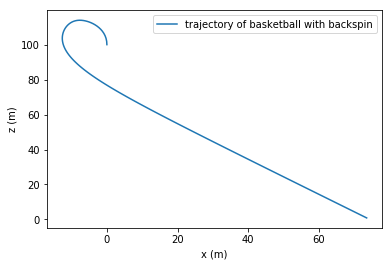

In [97]:
fig = plt.figure()
fig = plt.figure()
ax = fig.add_subplot(111)
tarray = np.linspace(0.0, 100, 100, endpoint = True)
ax.plot(projectile10.x_RK4, projectile10.z_RK4, label = "trajectory of basketball with backspin")
plt.legend(loc = "upper right",fontsize = 10)
plt.xlabel("x (m)", fontsize = 10)
plt.ylabel("z (m)", fontsize = 10)
plt.show()